# Brute-Force Matching with ORB Descriptors

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('logo.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('image.jpg',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

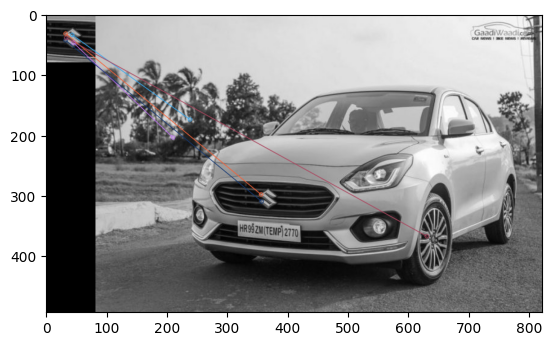

In [5]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:5],(0,255,0),flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3)

# Brute-Force Matching with SIFT Descriptors and Ratio Test


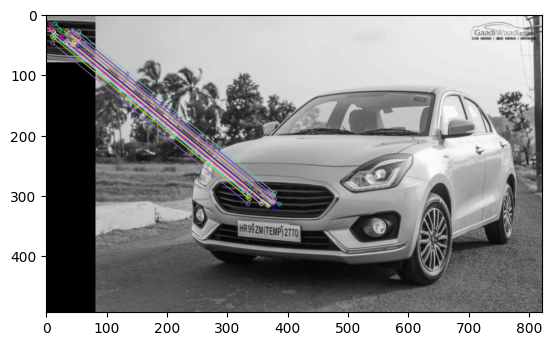

(<matplotlib.image.AxesImage at 0x7c5673e84ad0>, None)

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('logo.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('image.jpg',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3),plt.show()

# FLANN + SIFT (float descriptors) — KD-Tree

In [11]:
import cv2 
img1 = cv2.imread('german.jpg')
img2 = cv2.imread('germanbooks.jpg')

101


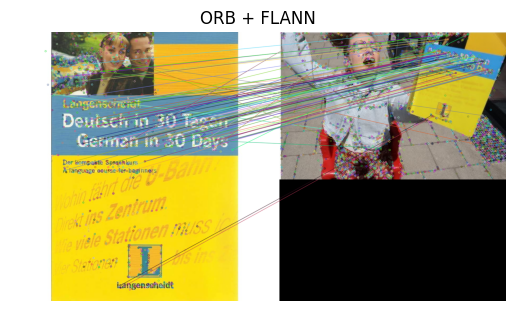

In [13]:
import cv2

# ----- Create SIFT -----
sift = cv2.SIFT_create()

# Keypoints + Descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# ----- FLANN for SIFT -----
index_params = dict(
    algorithm = 1,    # KDTree
    trees = 5         # Number of trees (5 is common)
)

search_params = dict(
    checks = 50     # Higher = more accurate, slower
)

flann = cv2.FlannBasedMatcher(index_params, search_params)

# KNN match (needed for Lowe ratio)
matches = flann.knnMatch(des1, des2, k=2)

# Lowe Ratio Test

good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)


print(len(good_matches))


# Draw matches
img_out = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.imshow(img_out[:, :, ::-1])   # convert BGR → RGB
plt.title("ORB + FLANN")
plt.axis('off')
plt.show()



# FLANN + ORB (binary descriptors) — LSH

7


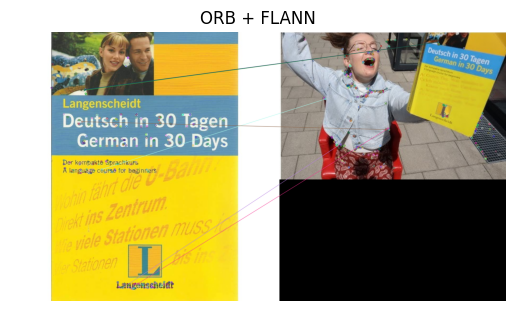

In [12]:
import cv2
import numpy as np
import matplotlib .pyplot as plt
# ----- Create ORB -----
orb = cv2.ORB_create()

# Keypoints + Descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Convert to uint8 (LSH requires this)
des1 = np.uint8(des1)
des2 = np.uint8(des2)

# ----- FLANN for ORB -----
index_params = dict(
    algorithm = 6,            # LSH
    table_number = 6,         # 12, 20 → bigger tables, more accuracy
    key_size = 12,            # 12–20 is common
    multi_probe_level = 2     # 2–4 increases accuracy
)

search_params = dict(
    checks = 50               # More checks → more accurate
)

flann = cv2.FlannBasedMatcher(index_params, search_params)

# KNN match (needed for Lowe ratio)
matches = flann.knnMatch(des1, des2, k=2)

# Lowe Ratio Test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print(len(good_matches))
# Draw matches
img_out = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.imshow(img_out[:, :, ::-1])   # convert BGR → RGB
plt.title("ORB + FLANN")
plt.axis('off')
plt.show()

